In [152]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

#경고문구 무시
import warnings
warnings.filterwarnings('ignore')

# 서포트 벡터 머신-연습

train data x size:(176, 13)
train data y size:(176,)
test data x size:(76, 13)
test data y size:(176,)


score on test set:0.181
score on test set:-0.036
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False) 


train data x size:(176, 13)
test data x size:(76, 13)


score on training set:0.578
score on test set:0.499
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False) 


C SCORE
        c  TrainScore  TestScore
0    0.01       0.018     -0.025
1    0.10       0.151      0.110
2    1.00       0.578      0.499
3   10.00       0.846      0.538
4  100.00       0.953      0.446 


GAMMA SCORE
    gamma  TrainScore  TestScore
0    0.01       0.764      0.594
1    0.10       0.868      0.537
2    1.00       0.927      0.164
3   10.00       0.912     -0.046
4  100.00       0.912     -0

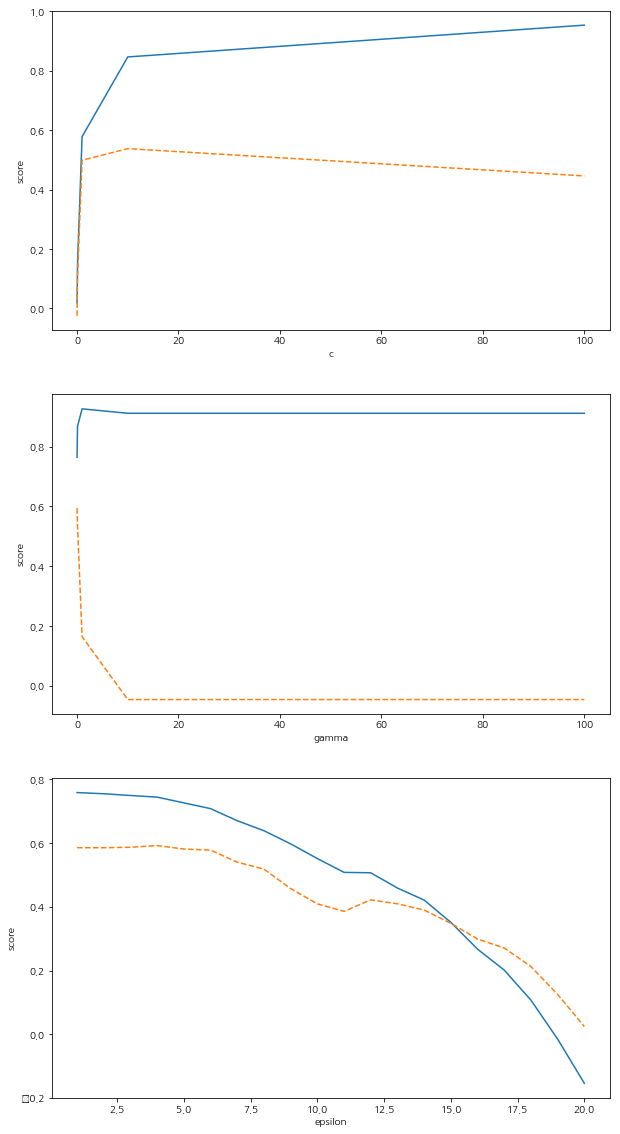

score on training set:0.764
score on test set:0.595


In [113]:
matplotlib.rc('font',family='NanumGothic')
df=pd.read_csv('체질검사.csv',engine='python')
df_y=df['FAT']
df_x=df.drop('FAT',axis=1,inplace=False)

#데이터 분할
df_train_x,df_test_x,df_train_y,df_test_y=train_test_split(df_x,df_y,test_size=0.3,random_state=1234)
print('train data x size:{}'.format(df_train_x.shape))
print('train data y size:{}'.format(df_train_y.shape))
print('test data x size:{}'.format(df_test_x.shape))
print('test data y size:{}\n\n'.format(df_train_y.shape))

#기본 모델 분석
svm_un=SVR()
svm_un.fit(df_train_x,df_train_y)
print('score on test set:{:.3f}'.format(svm_un.score(df_train_x,df_train_y)))
print('score on test set:{:.3f}'.format(svm_un.score(df_test_x,df_test_y)))
print(svm_un,'\n\n')

#x스케일 변환
feature_names=df_train_x.columns

scaler=StandardScaler()
df_scaled=scaler.fit_transform(df_x)
df_scaled=pd.DataFrame(df_scaled,columns=feature_names)
df_scaled.head()

df_scaled_train_x,df_scaled_test_x=train_test_split(df_scaled,test_size=0.3,random_state=1234)
print('train data x size:{}'.format(df_scaled_train_x.shape))
print('test data x size:{}\n\n'.format(df_scaled_test_x.shape))

#스케일 변환된 데이터 모델 분석
svm_scaled=SVR()
svm_scaled.fit(df_scaled_train_x,df_train_y)
print('score on training set:{:.3f}'.format(svm_scaled.score(df_scaled_train_x,df_train_y)))
print('score on test set:{:.3f}'.format(svm_scaled.score(df_scaled_test_x,df_test_y)))
print(svm_sclaed,'\n\n')

#c 최적 값 찾기
train_score=[]; test_score=[]
para_c=[10**c for c in range(-2,3)]
for v_C in para_c:
    svm=SVR(C=v_C)
    svm.fit(df_scaled_train_x,df_train_y)
    train_score.append(svm.score(df_scaled_train_x,df_train_y))
    test_score.append(svm.score(df_scaled_test_x,df_test_y))

#c 스코어
print('C SCORE')
df_score_C = pd.DataFrame()
df_score_C['c']=para_c
df_score_C['TrainScore']=train_score
df_score_C['TestScore']=test_score
print(df_score_C.round(3),'\n\n')

#c 그래프
fig = plt.figure(figsize=(10, 20)) 
gs = gridspec.GridSpec(nrows=3, # row 몇 개 
                       ncols=1, # col 몇 개 
                       height_ratios=[1, 1, 1], 
                       width_ratios=[9])

ax1 = fig.add_subplot(gs[0])
plt.plot(para_c,train_score,linestyle='-',label='Train Score')
plt.plot(para_c,test_score,linestyle='--',label='Test Score')
plt.ylabel('score'); plt.xlabel('c')


#gamma 최적값 찾기
train_score2=[]; test_score2=[]
para_gamma=[10**gamma for gamma in range(-2,3)]
for v_gamma in para_gamma:
    svm=SVR(gamma=v_gamma,C=10)
    svm.fit(df_scaled_train_x,df_train_y)
    train_score2.append(svm.score(df_scaled_train_x,df_train_y))
    test_score2.append(svm.score(df_scaled_test_x,df_test_y))

#gamma 스코어
print('GAMMA SCORE')
df_score_gamma = pd.DataFrame()
df_score_gamma['gamma']=para_gamma
df_score_gamma['TrainScore']=train_score2
df_score_gamma['TestScore']=test_score2
print(df_score_gamma.round(3),'\n\n')

#gamma 그래프
ax2 = fig.add_subplot(gs[1])
plt.plot(para_gamma,train_score2,linestyle='-',label='Train Score')
plt.plot(para_gamma,test_score2,linestyle='--',label='Test Score')
plt.ylabel('score'); plt.xlabel('gamma')


#epsilon 최적값 찾기
train_score3=[]; test_score3=[]
para_epsilon=[eps for eps in range(1,21)]
for v_epsilon in para_epsilon:
    svm=SVR(epsilon=v_epsilon,C=10,gamma=0.01)
    svm.fit(df_scaled_train_x,df_train_y)
    train_score3.append(svm.score(df_scaled_train_x,df_train_y))
    test_score3.append(svm.score(df_scaled_test_x,df_test_y))

#epsilon  스코어
print('EPSILON SCORE')
df_score_epsilon = pd.DataFrame()
df_score_epsilon['gamma']=para_epsilon
df_score_epsilon['TrainScore']=train_score3
df_score_epsilon['TestScore']=test_score3
print(df_score_epsilon.round(3),'\n\n')

#epsilon  그래프
ax3 = fig.add_subplot(gs[2])
plt.plot(para_epsilon,train_score3,linestyle='-',label='Train Score')
plt.plot(para_epsilon,test_score3,linestyle='--',label='Test Score')
plt.ylabel('score'); plt.xlabel('epsilon')

plt.show()
#최종 모델 생성
svr_final=SVR(C=10,gamma=0.01,epsilon=0.05)
svr_final.fit(df_scaled_train_x,df_train_y)
print('score on training set:{:.3f}'.format(svr_final.score(df_scaled_train_x,df_train_y)))
print('score on test set:{:.3f}'.format(svr_final.score(df_scaled_test_x,df_test_y)))



# knn-연습

In [91]:
from sklearn.neighbors import KNeighborsRegressor
import seaborn as sns
#install plotly

from matplotlib import gridspec


score on test set:0.740
score on test set:0.539
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform') 


N SCORE


,c,TrainScore,TestScore
0,1,1.000,0.260
1,2,0.841,0.416
2,3,0.793,0.468
3,4,0.755,0.512
4,5,0.740,0.539
5,6,0.720,0.515
6,7,0.700,0.499
7,8,0.687,0.516
8,9,0.664,0.518
9,10,0.646,0.524


W SCORE


,TrainScore_distance,TrainScore_uniform,TestScore_distance,TestScore_uniform
neighbors,,,,
1,1.0,1.000000,0.260301,0.260301
2,1.0,0.840753,0.431951,0.415927
3,1.0,0.792742,0.487390,0.467537
4,1.0,0.754752,0.527435,0.511723
5,1.0,0.740025,0.550285,0.538785


metric SCORE


,neighbors,metric,TrainScore,TestScore
0,1,minkowski,1.000,0.260
1,2,minkowski,0.841,0.416
2,3,minkowski,0.793,0.468
3,4,minkowski,0.755,0.512
4,5,minkowski,0.740,0.539
5,6,minkowski,0.720,0.515
6,7,minkowski,0.700,0.499
7,8,minkowski,0.687,0.516
8,9,minkowski,0.664,0.518
9,10,minkowski,0.646,0.524


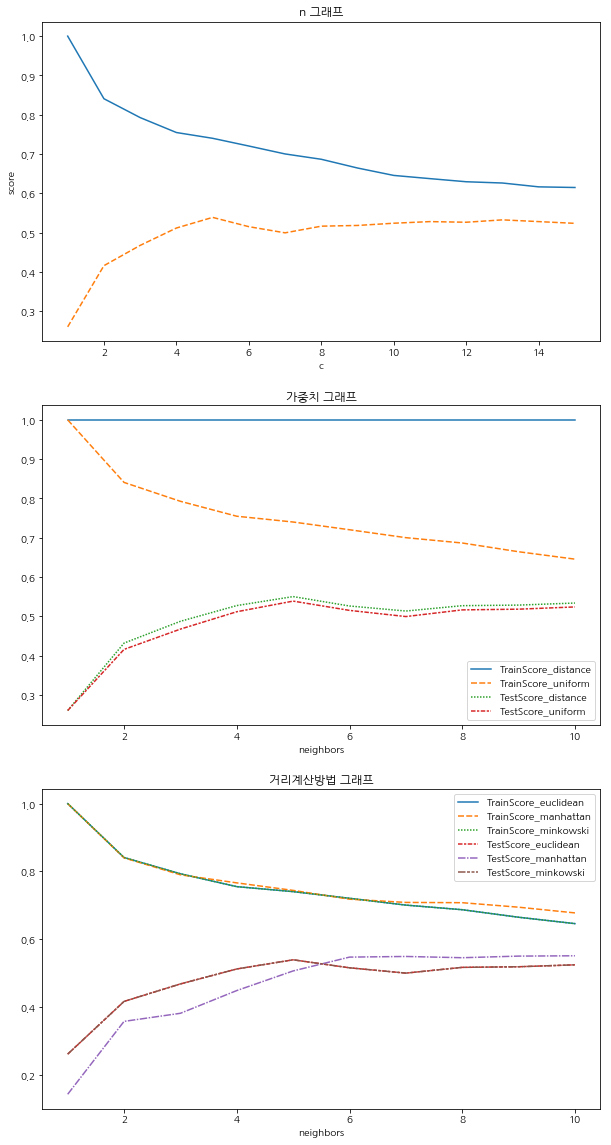

score on training set:0.740
score on test set:0.539


In [151]:
#기본 모델 분석
knn_un=KNeighborsRegressor()
knn_un.fit(df_train_x,df_train_y)
print('score on test set:{:.3f}'.format(knn_un.score(df_train_x,df_train_y)))
print('score on test set:{:.3f}'.format(knn_un.score(df_test_x,df_test_y)))
print(knn_un,'\n\n')

#n 최적 값 찾기
train_score=[]; test_score=[]
para_n=[i for i in range(1,16)]
for v_n_neighbors in para_n:
    knn=KNeighborsRegressor(n_neighbors=v_n_neighbors)
    knn.fit(df_train_x,df_train_y)
    train_score.append(knn.score(df_train_x,df_train_y))
    test_score.append(knn.score(df_test_x,df_test_y))

#n 스코어
print('N SCORE')
df_score_knn = pd.DataFrame()
df_score_knn['c']=para_n
df_score_knn['TrainScore']=train_score
df_score_knn['TestScore']=test_score
display(df_score_knn.round(3))

#n 그래프
fig = plt.figure(figsize=(10, 20)) 
gs = gridspec.GridSpec(nrows=3, # row 몇 개 
                       ncols=1, # col 몇 개 
                       height_ratios=[1, 1, 1], 
                       width_ratios=[9])

ax1 = fig.add_subplot(gs[0])
plt.title('n 그래프')
plt.plot(para_n,train_score,linestyle='-',label='Train Score')
plt.plot(para_n,test_score,linestyle='--',label='Test Score')
plt.ylabel('score'); plt.xlabel('c')


#가중치 최적 값 찾기
train_score2=[]; test_score2=[]
para_n=[i for i in range(1,11)]*2
para_w=(['uniform']*10)+(['distance']*10)
for (v_n_neighbors,v_weights) in zip(para_n,para_w):
    knn=KNeighborsRegressor(n_neighbors=v_n_neighbors,weights=v_weights)
    knn.fit(df_train_x,df_train_y)
    train_score2.append(knn.score(df_train_x,df_train_y))
    test_score2.append(knn.score(df_test_x,df_test_y))

#가중치 스코어
print('W SCORE')
df_score_w = pd.DataFrame()
df_score_w['neighbors']=para_n
df_score_w['weight']=para_w
df_score_w['TrainScore']=train_score2
df_score_w['TestScore']=test_score2


#가중치 표

df_score_w_pivot=df_score_w.pivot(index='neighbors',columns='weight',values=['TrainScore','TestScore'])
level0=df_score_w_pivot.columns.get_level_values(0)
level1=df_score_w_pivot.columns.get_level_values(1)
df_score_w_pivot.columns=level0+'_'+level1
display(df_score_w_pivot.head())

#가중치 그래프
ax2 = fig.add_subplot(gs[1])
plt.title('가중치 그래프')
sns.lineplot(data=df_score_w_pivot)

#최적 거리계산 방법 찾기
train_score3=[]; test_score3=[]
para_n=[i for i in range(1,11)]*3
para_m=(['minkowski']*10)+(['euclidean']*10)+(['manhattan']*10)

for (v_n_neighbors,v_metric) in zip(para_n,para_m):
    knn=KNeighborsRegressor(weights='uniform',n_neighbors=v_n_neighbors,metric=v_metric)
    knn.fit(df_train_x,df_train_y)
    train_score3.append(knn.score(df_train_x,df_train_y))
    test_score3.append(knn.score(df_test_x,df_test_y))


                       
#거리계산방법 스코어
print('metric SCORE')
df_score_m = pd.DataFrame()
df_score_m['neighbors']=para_n
df_score_m['metric']=para_m
df_score_m['TrainScore']=train_score3
df_score_m['TestScore']=test_score3
display(df_score_m.round(3))

#거리계산방법 그래프
ax3 = fig.add_subplot(gs[2])
plt.title('거리계산방법 그래프')
df_score_m_pivot=df_score_m.pivot(index='neighbors',columns='metric',values=['TrainScore','TestScore'])
level0=df_score_m_pivot.columns.get_level_values(0)
level1=df_score_m_pivot.columns.get_level_values(1)
df_score_m_pivot.columns=level0+'_'+level1
sns.lineplot(data=df_score_m_pivot)

plt.show()

#최종모델
knn_final=KNeighborsRegressor(n_neighbors=5,weights='uniform',metric='euclidean')
knn_final.fit(df_train_x,df_train_y)
print('score on training set:{:.3f}'.format(knn_final.score(df_train_x,df_train_y)))
print('score on test set:{:.3f}'.format(knn_final.score(df_test_x,df_test_y)))



# 시계열 분석-연습

In [127]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from datetime import datetime
import pandas as pd
import numpy as np
%matplotlib inline

,CURRENCY,APPL_DATE,STD_RATE,USD_CONV_DATE
0,CNY,2016-01-01,181.48,0.1541
1,JPY,2016-01-01,976.99,0.8294
2,USD,2016-01-01,1178.00,1.0000
3,CNY,2016-01-02,181.48,0.1541
4,JPY,2016-01-02,976.99,0.8294


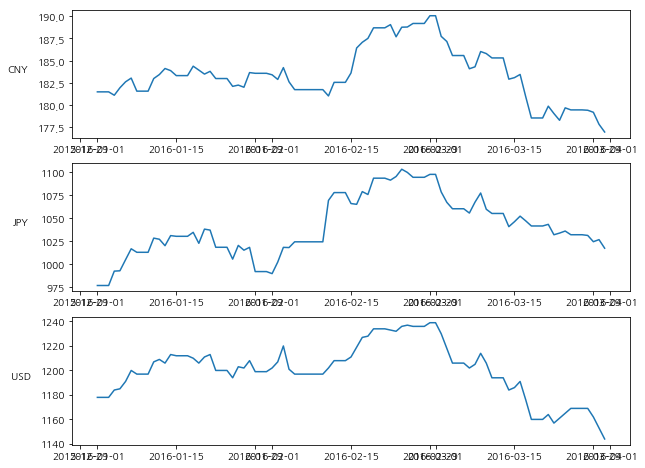

In [123]:
df=pd.read_csv('환율.csv',engine='python',parse_dates=['APPL_DATE'],encoding='949')
display(df.head())

fig,(ax1,ax2,ax3)=plt.subplots(nrows=3,ncols=1,figsize=(10,8))
for(ax,idx,currency) in zip([ax1,ax2,ax3],[311,312,313],['CNY','JPY','USD']):
    ax.plot('APPL_DATE','STD_RATE',data=df[df['CURRENCY']==currency])
    ax.set_ylabel(currency,rotation=0,labelpad=20)

,STD_RATE
APPL_DATE,
2016-01-01,181.48
2016-01-02,181.48
2016-01-03,181.48
2016-01-04,181.10
2016-01-05,181.94


[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False False
 False False False False False False False] 


shape of train data:(82, 1)
shape of test data:(9, 1) 




,STD_RATE
APPL_DATE,
2016-03-23,178.28
2016-03-24,179.68
2016-03-25,179.45
2016-03-26,179.45
2016-03-27,179.45


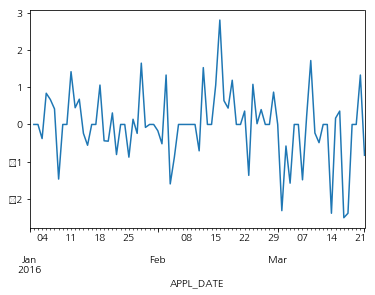

In [133]:
df_CNY=df[df['CURRENCY']=='CNY'].set_index('APPL_DATE')
df_CNY.drop(['CURRENCY','USD_CONV_DATE'],axis=1,inplace=True)

df_JPY=df[df['CURRENCY']=='JPY'].set_index('APPL_DATE')
df_JPY.drop(['CURRENCY','USD_CONV_DATE'],axis=1,inplace=True)

df_USD=df[df['CURRENCY']=='USD'].set_index('APPL_DATE')
df_USD.drop(['CURRENCY','USD_CONV_DATE'],axis=1,inplace=True)
display(df_CNY.head())

train_size=0.9
len_idx=len(df_CNY.index)
mask=(np.arange(len_idx)/len_idx)<train_size
print(mask,'\n\n')

df_CNY_train=df_CNY[mask]
df_CNY_test=df_CNY[~mask]
print('shape of train data:{}'.format(df_CNY_train.shape))
print('shape of test data:{}'.format(df_CNY_test.shape),'\n\n')

df_CNY_train=df_CNY[df_CNY.index<='2016-03-22']
df_CNY_test=df_CNY[df_CNY.index>'2016-03-22']
display(df_CNY_test.head())

df_CNY_diff1=df_CNY_train['STD_RATE']-df_CNY_train['STD_RATE'].shift(1)
df_CNY_diff1.plot()

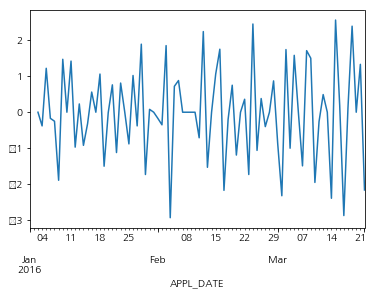

In [135]:
df_CNY_diff2=df_CNY_train['STD_RATE']-2*(df_CNY_train['STD_RATE'].shift(1))+(df_CNY_train['STD_RATE'].shift(2))
df_CNY_diff2.plot()

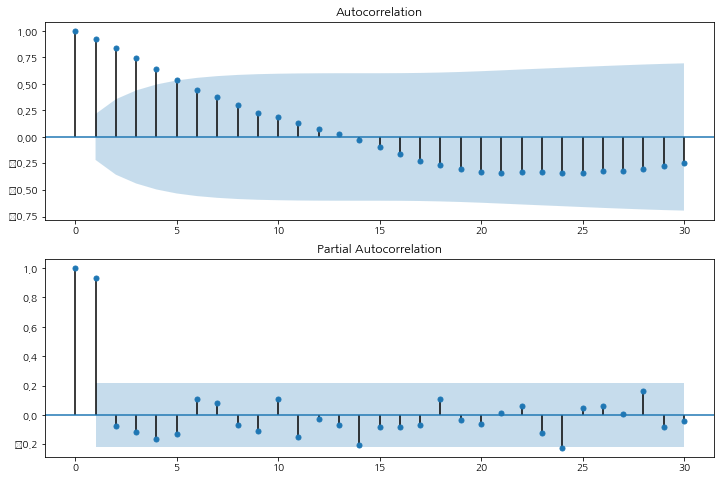

In [136]:
lag_size=30
fig=plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig=plot_acf(df_CNY_train['STD_RATE'],lags=lag_size,ax=ax1)
ax2=fig.add_subplot(212)
fig=plot_pacf(df_CNY_train['STD_RATE'],lags=lag_size,ax=ax2)

In [137]:
ts_model_cny=ARIMA(df_CNY_train,order=(1,2,0))
ts_result_cny=ts_model_cny.fit(trend='c',full_output=True,disp=1)
print(ts_result_cny.summary())

                             ARIMA Model Results                              
Dep. Variable:            D2.STD_RATE   No. Observations:                   80
Model:                 ARIMA(1, 2, 0)   Log Likelihood                -123.512
Method:                       css-mle   S.D. of innovations              1.132
Date:                Thu, 02 May 2019   AIC                            253.025
Time:                        14:12:35   BIC                            260.171
Sample:                    01-03-2016   HQIC                           255.890
                         - 03-22-2016                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0022      0.088     -0.024      0.981      -0.175       0.171
ar.L1.D2.STD_RATE    -0.4389      0.102     -4.322      0.000      -0.638      -0.240
                        

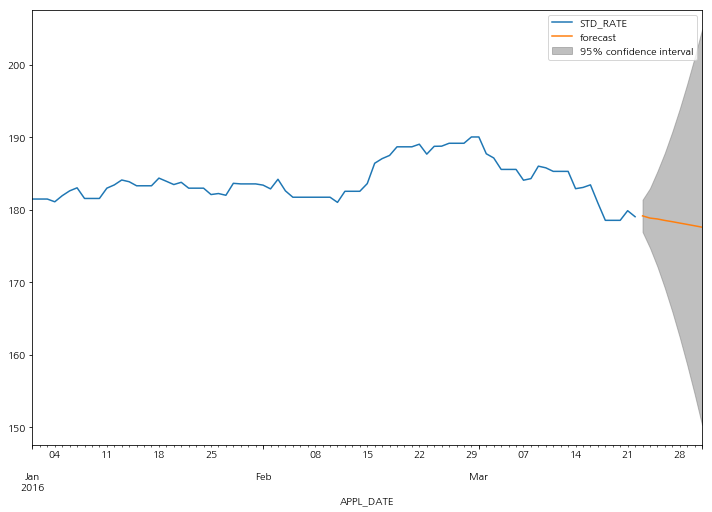

In [138]:
start_time=df_CNY_test.index.min()
end_time=df_CNY_test.index.max()
fig,ax=plt.subplots(figsize=(12,8))

ax=df_CNY_train.plot(ax=ax)
fig=ts_result_cny.plot_predict(start=start_time,end=end_time,ax=ax,plot_insample=False)


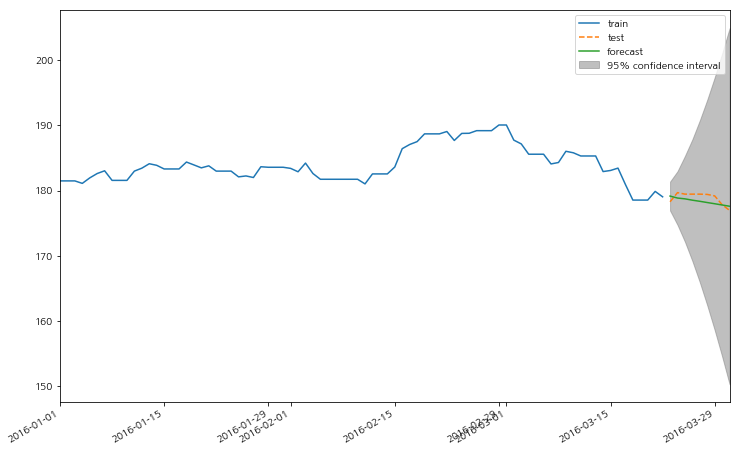

In [140]:
start_time=df_CNY_test.index.min()
end_time=df_CNY_test.index.max()
fig,ax=plt.subplots(figsize=(12,8))
plt.plot(df_CNY_train,linestyle='-',label='train')
plt.plot(df_CNY_test,linestyle='--',label='test')

fig=ts_result_cny.plot_predict(start=start_time,end=end_time,ax=ax,plot_insample=False)
plt.show()


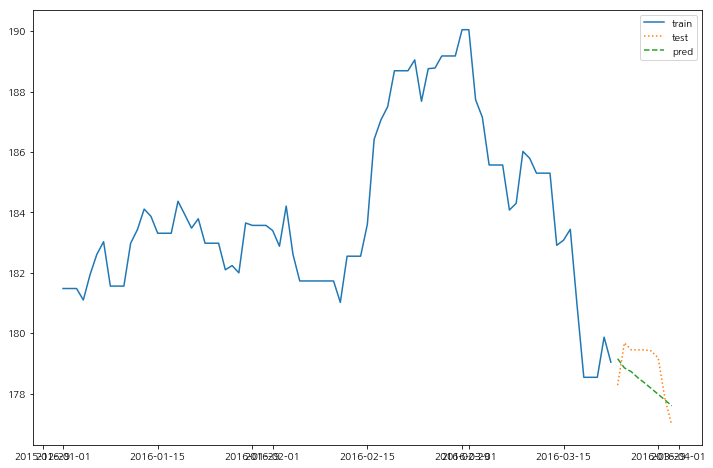

In [141]:
start_time=df_CNY_test.index.min()
end_time=df_CNY_test.index.max()
y_pred=ts_result_cny.predict(start=start_time,end=end_time,typ='levels')
plt.subplots(figsize=(12,8))
plt.plot(df_CNY_train,linestyle='-',label='train')
plt.plot(df_CNY_test,linestyle=':',label='test')
plt.plot(y_pred,linestyle='--',label='pred')
plt.legend()


# 시계열 분석-실습

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False False
 False False False False False False False] 


shape of train data:(82, 1)
shape of test data:(9, 1) 




,STD_RATE
APPL_DATE,
2016-03-23,1161.0
2016-03-24,1165.0
2016-03-25,1169.0
2016-03-26,1169.0
2016-03-27,1169.0


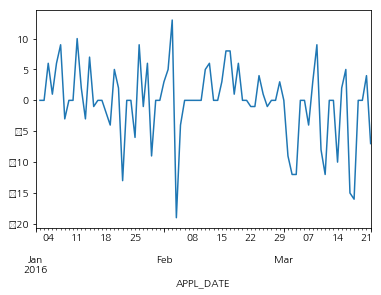

In [142]:
train_size=0.9
len_idx=len(df_USD.index)
mask=(np.arange(len_idx)/len_idx)<train_size
print(mask,'\n\n')

df_USD_train=df_USD[mask]
df_USD_test=df_USD[~mask]
print('shape of train data:{}'.format(df_USD_train.shape))
print('shape of test data:{}'.format(df_USD_test.shape),'\n\n')

df_USD_train=df_USD[df_USD.index<='2016-03-22']
df_USD_test=df_USD[df_USD.index>'2016-03-22']
display(df_USD_test.head())

df_USD_diff1=df_USD_train['STD_RATE']-df_USD_train['STD_RATE'].shift(1)
df_USD_diff1.plot()

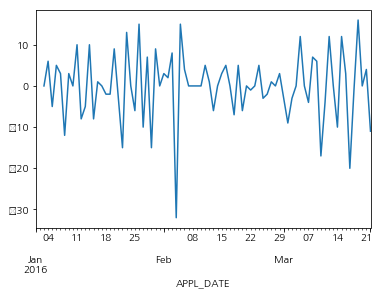

In [143]:
df_USD_diff2=df_USD_train['STD_RATE']-2*(df_USD_train['STD_RATE'].shift(1))+(df_USD_train['STD_RATE'].shift(2))
df_USD_diff2.plot()

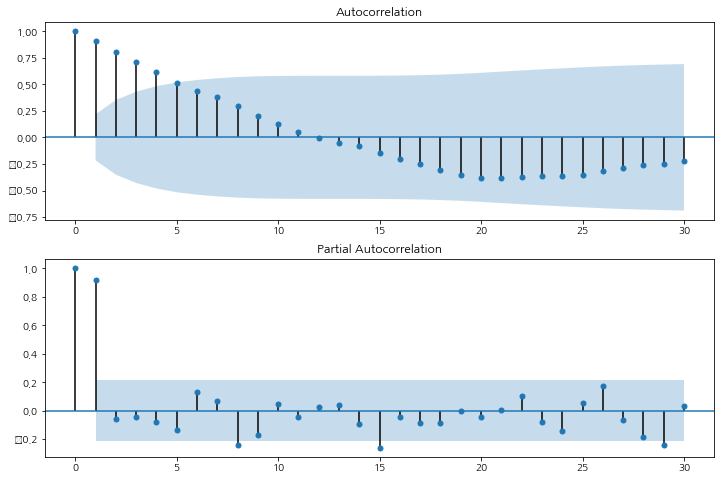

In [144]:
lag_size=30
fig=plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig=plot_acf(df_USD_train['STD_RATE'],lags=lag_size,ax=ax1)
ax2=fig.add_subplot(212)
fig=plot_pacf(df_USD_train['STD_RATE'],lags=lag_size,ax=ax2)

In [145]:
ts_model_cny=ARIMA(df_USD_train,order=(1,2,0))
ts_result_cny=ts_model_cny.fit(trend='c',full_output=True,disp=1)
print(ts_result_cny.summary())

                             ARIMA Model Results                              
Dep. Variable:            D2.STD_RATE   No. Observations:                   80
Model:                 ARIMA(1, 2, 0)   Log Likelihood                -274.800
Method:                       css-mle   S.D. of innovations              7.502
Date:                Thu, 02 May 2019   AIC                            555.601
Time:                        14:23:21   BIC                            562.747
Sample:                    01-03-2016   HQIC                           558.466
                         - 03-22-2016                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0502      0.612     -0.082      0.935      -1.249       1.148
ar.L1.D2.STD_RATE    -0.3763      0.104     -3.622      0.001      -0.580      -0.173
                        

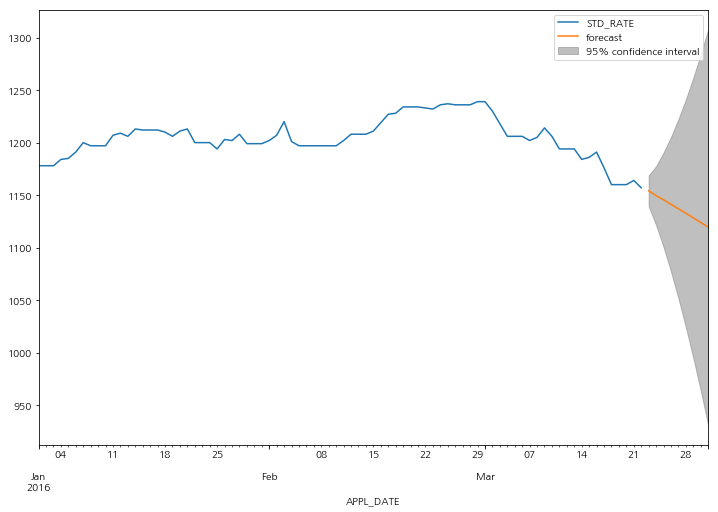

In [146]:
start_time=df_USD_test.index.min()
end_time=df_USD_test.index.max()
fig,ax=plt.subplots(figsize=(12,8))

ax=df_USD_train.plot(ax=ax)
fig=ts_result_cny.plot_predict(start=start_time,end=end_time,ax=ax,plot_insample=False)


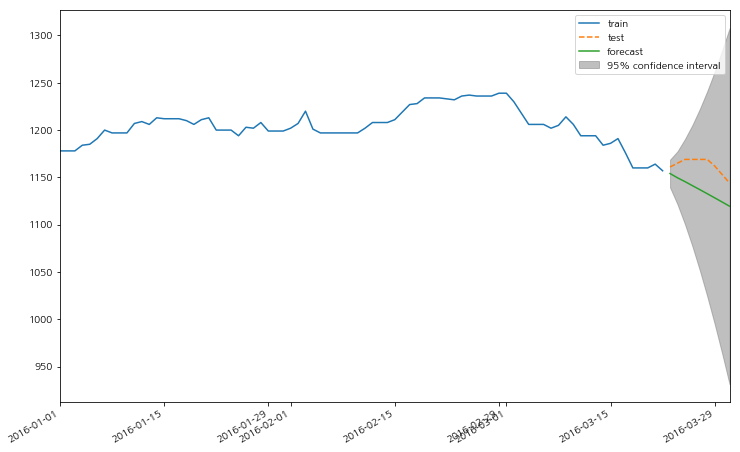

In [147]:
start_time=df_USD_test.index.min()
end_time=df_USD_test.index.max()
fig,ax=plt.subplots(figsize=(12,8))
plt.plot(df_USD_train,linestyle='-',label='train')
plt.plot(df_USD_test,linestyle='--',label='test')

fig=ts_result_cny.plot_predict(start=start_time,end=end_time,ax=ax,plot_insample=False)
plt.show()


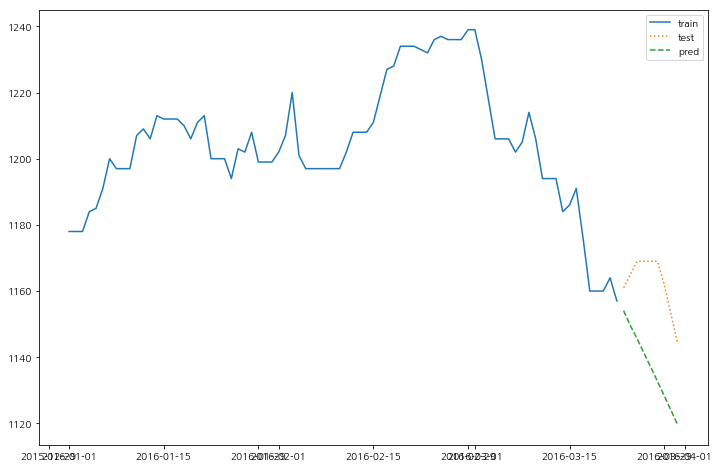

In [148]:
start_time=df_USD_test.index.min()
end_time=df_USD_test.index.max()
y_pred=ts_result_cny.predict(start=start_time,end=end_time,typ='levels')
plt.subplots(figsize=(12,8))
plt.plot(df_USD_train,linestyle='-',label='train')
plt.plot(df_USD_test,linestyle=':',label='test')
plt.plot(y_pred,linestyle='--',label='pred')
plt.legend()
